In [2]:
from IPython.display import display, Image
import pandas as pd, numpy as np
import random
import numpy.linalg as la
import matplotlib.pyplot as plt
from sympy import *

### Media y Varianza muestrales

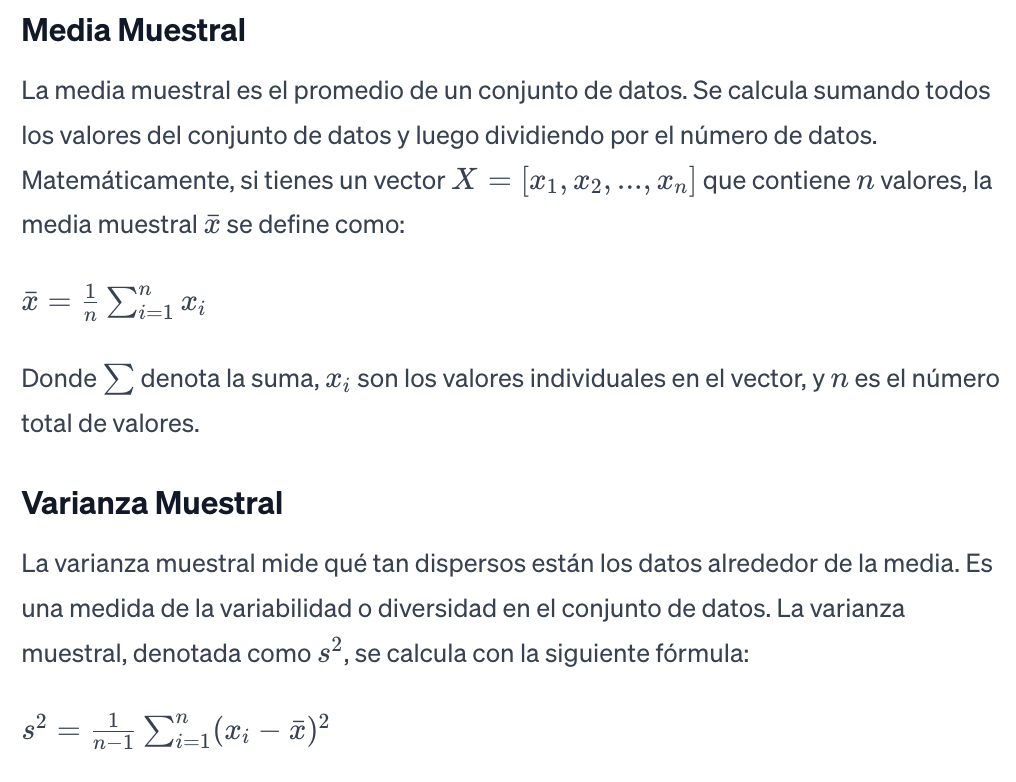

In [3]:
# la varianza o variabilidad de un conjunto de datos es una medida de cuánta 'información' hay en los mismos

##### Ejemplo

In [10]:
np.random.seed(1)
mu=0
sigma=1
data=np.random.normal(mu,sigma,1000)
data

array([ 1.62434536e+00, -6.11756414e-01, -5.28171752e-01, -1.07296862e+00,
        8.65407629e-01, -2.30153870e+00,  1.74481176e+00, -7.61206901e-01,
        3.19039096e-01, -2.49370375e-01,  1.46210794e+00, -2.06014071e+00,
       -3.22417204e-01, -3.84054355e-01,  1.13376944e+00, -1.09989127e+00,
       -1.72428208e-01, -8.77858418e-01,  4.22137467e-02,  5.82815214e-01,
       -1.10061918e+00,  1.14472371e+00,  9.01590721e-01,  5.02494339e-01,
        9.00855949e-01, -6.83727859e-01, -1.22890226e-01, -9.35769434e-01,
       -2.67888080e-01,  5.30355467e-01, -6.91660752e-01, -3.96753527e-01,
       -6.87172700e-01, -8.45205641e-01, -6.71246131e-01, -1.26645989e-02,
       -1.11731035e+00,  2.34415698e-01,  1.65980218e+00,  7.42044161e-01,
       -1.91835552e-01, -8.87628964e-01, -7.47158294e-01,  1.69245460e+00,
        5.08077548e-02, -6.36995647e-01,  1.90915485e-01,  2.10025514e+00,
        1.20158952e-01,  6.17203110e-01,  3.00170320e-01, -3.52249846e-01,
       -1.14251820e+00, -

In [11]:
len(data)

1000

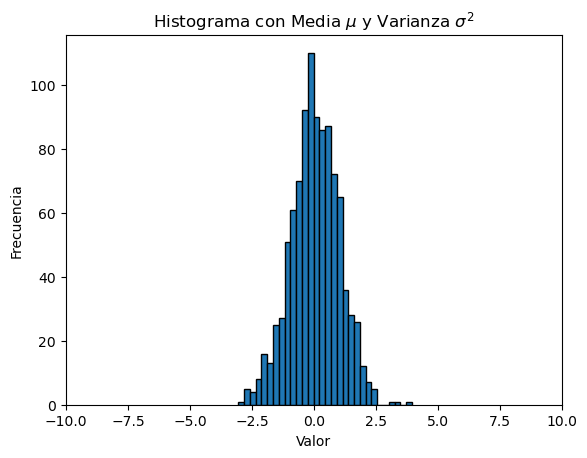

In [15]:
#Crear el histograma
plt.hist(data,bins=30,edgecolor='black')
#etiqueta y título
plt.xlabel('Valor')
plt.ylabel('Frecuencia')
plt.title(f'Histograma con Media $\mu$ y Varianza $\sigma^2$')
plt.xlim(-10,10)

#Mostrar el histograma
plt.show()

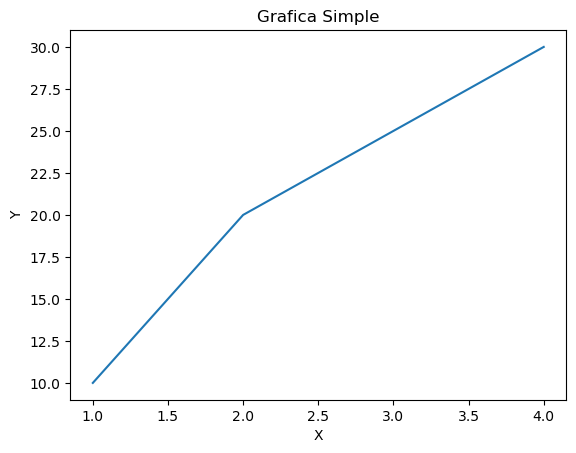

In [17]:
#Pyplot (Basado-State) Interfaz
plt.plot([1,2,3,4],[10,20,25,30])
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Grafica Simple')
plt.show()

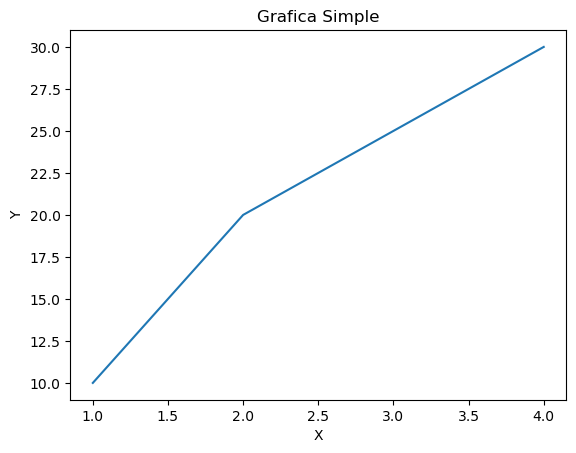

In [21]:
#Interfaz orientada a objetos
fig, ax= plt.subplots()
ax.plot([1,2,3,4],[10,20,25,30])
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_title('Grafica Simple')
plt.show()

### Matrices (cont...):

##### Traza de una matriz

La traza de una matriz, denotada como $ \text{tr}(A) $, es una operación que se aplica a matrices cuadradas.  Se define como la suma de los elementos en la diagonal principal. Si tenemos una matriz cuadrada $ A $ de tamaño $ n \times n $ con elementos $ a_{ij} $, donde $ i $ y $ j $ son índices que recorren las filas y columnas respectivamente, la traza se calcula como:

$$ \text{tr}(A) = \sum_{i=1}^{n} a_{ii} $$

Es decir, sumamos los elementos $ a_{11}, a_{22}, a_{33}, \ldots, a_{nn} $.

### Ejemplo

Consideremos una matriz cuadrada $ A $ de $ 3 \times 3 $:

$ A = \begin{bmatrix} 1 & 2 & 3 \\ 4 & 5 & 6 \\ 7 & 8 & 9 \end{bmatrix} $

La traza de $ A $, $ \text{tr}(A) $, sería la suma de los elementos de la diagonal principal:

$ \text{tr}(A) = 1 + 5 + 9 = 15 $

### Propiedades de la Traza

- La traza de la suma de dos matrices es igual a la suma de las trazas de cada matriz: $ \text{tr}(A + B) = \text{tr}(A) + \text{tr}(B) $.
-  $ \text{tr}(AB) = \text{tr}(BA) $ siempre que el producto esté definido (que se puedan multiplicar por las dimensiones)
- usamos la función `trace()` de numpy para calcularla.

In [22]:
m=np.random.randint(1,10,(3,3)) #enteros
print(m)

[[3 9 1]
 [2 1 4]
 [2 1 7]]


In [23]:
np.trace(m)

11

In [39]:
np.random.uniform(1,10,(3,3)) #flotantes

array([[8.99196845, 5.66229305, 4.35473922],
       [7.3931912 , 5.10079082, 6.44691606],
       [9.91365577, 7.96524625, 4.00848764]])

## Determinante de una matriz:

El determinante de una matriz es un valor escalar que proporciona información importante sobre la matriz. Se aplica a matrices cuadradas.

**Definición y Cálculo**

El determinante de una matriz cuadrada $A$ de orden $n$ se denota comúnmente como $\det(A)$ o $|A|$. Para matrices de ordenes bajos, el determinante se calcula de la siguiente manera:

- Para una matriz $1 \times 1$, $A = [a]$, el determinante es simplemente el elemento de la matriz, $\det(A) = a$.
- Para una matriz $2 \times 2$, $A = \begin{bmatrix} a & b \\ c & d \end{bmatrix}$, el determinante se calcula como $\det(A) = ad - bc$.
- Para matrices de mayor orden, el cálculo se vuelve más complejo e involucra la noción de "menores" y "cofactores".

**Interpretaciones**

1. **Interpretación Geométrica**: En $\mathbb{R}^2$ y $\mathbb{R}^3$, el valor absoluto del determinante de una matriz, que representa una transformación lineal, da el área (en $\mathbb{R}^2$) o el volumen (en $\mathbb{R}^3$) del paralelogramo o paralelepípedo formado por los vectores columna de la matriz.

2. **Sistemas de Ecuaciones Lineales**: El determinante proporciona información sobre la solubilidad de un sistema de ecuaciones lineales. Un sistema representado por una matriz cuadrada tiene una solución única si y solo si el determinante de la matriz es diferente de cero.

3. **Invertibilidad de la Matriz**: Una matriz es invertible (o no singular) si y solo si su determinante es diferente de cero.

**Ejemplo**

Para una matriz $2 \times 2$ $A = \begin{bmatrix} 1 & 2 \\ 3 & 4 \end{bmatrix}$, el determinante se calcula como:

$$\det(A) = (1 \times 4) - (2 \times 3) = 4 - 6 = -2$$

Este resultado nos indica varias cosas sobre la matriz $A$. Por ejemplo, dado que el determinante no es cero, $A$ es invertible. Además, si interpretamos $A$ como una transformación en $\mathbb{R}^2$, esta transformación altera el área de las figuras en un factor de 2, y la transformación incluye una reflexión, indicada por el signo negativo del determinante.


En numpy usamos `la.det()` para calcular el determinante:

In [40]:
A=np.array([
    [1,2],
    [3,4]
])
la.det(A)

-2.0000000000000004

##### Forma cuadrática

Es una expresión de la forma $ \mathbf{x}^T A \mathbf{x} $, donde $ \mathbf{x} $ es un vector columna y $ A $ es una matriz cuadrada. La expresión representa un ESCALAR obtenido como resultado del producto de tres términos: el vector transpuesto $ \mathbf{x}^T $, la matriz $ A $, y el vector $ \mathbf{x} $ de nuevo.

Si $ \mathbf{x} $ es un vector de $ n $ dimensiones y $ A $ es una matriz de $ n \times n $, entonces la forma cuadrática $ \mathbf{x}^T A \mathbf{x} $ se expande como:

$$ \mathbf{x}^T A \mathbf{x} = \sum_{i=1}^{n} \sum_{j=1}^{n} a_{ij} x_i x_j $$

Donde $ a_{ij} $ son los elementos de la matriz $ A $, y $ x_i $, $ x_j $ son las componentes del vector $ \mathbf{x} $.

Consideremos el efecto que tiene la matriz:
$A = \begin{bmatrix} 3 & -2 \\ 1 & 0 \end{bmatrix}$


In [41]:
#Definamos la matriz A y los vectores u y v. 
A=np.array([
    [3,-2],[1,0]
])
u=np.array([-1,1])
v=np.array([2,1])
print(A)

[[ 3 -2]
 [ 1  0]]


<img src="eigenvalores.png" width=300 style="float:left"/>

In [42]:
Au=np.dot(A,u)
print(Au)

[-5 -1]


In [43]:
Av=np.dot(A,v)
print(Av)

[4 2]


In [46]:
#función para graficar el efecto de multiplicar una matriz por un vector
def graf_matmul(A,v):
    C=A
    v3=v
    #multiplicación
    resulting_v3=np.dot(C,v3)

    #Crear la gráfica
    plt.figure(figsize=(8,6))
    plt.quiver(0,0,v3[0],v3[1],angles='xy',scale_units='xy',scale=1,color='blue',label=r'$\mathbf{v}$')
    plt.quiver(0,0,resulting_v3[0],resulting_v3[1],angles='xy',scale_units='xy',scale=1,color='red',label=r'$\mathbf{Av}$')
    
    #Límites
    plt.xlim(-10,10)
    plt.ylim(-10,10)
    plt.gca().set_aspect('equal',adjustable='box')
    
    #Agregar cuadrícula, etiquetas,títulos y leyendas. 
    plt.grid(True)
    plt.axhline(y=0,color='k')
    plt.axvline(x=0,color='k')
    plt.xlabel('eje X')
    plt.ylabel('eje Y')
    plt.title('Efecto de multiplizar la matrix C por el vector (3,2)')
    plt.legend()

    #mostrando el gráfico
    plt.show()
    print(resulting_v3)

In [49]:
A

array([[ 3, -2],
       [ 1,  0]])

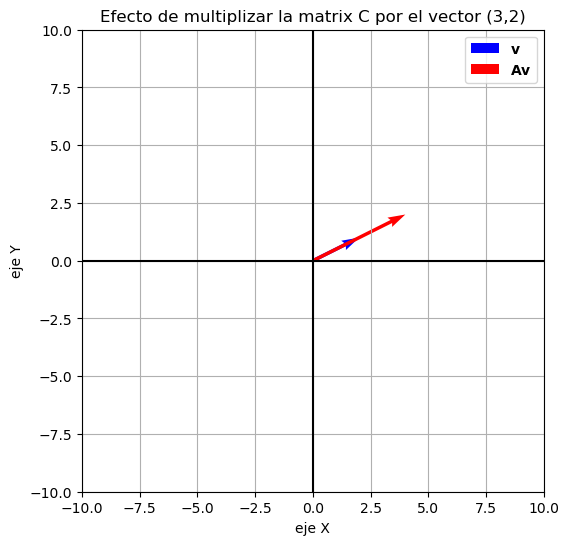

[4 2]


In [47]:
graf_matmul(A,v)

In [48]:
v

array([2, 1])

In [ ]:
Av == 2*v
#En este caso, Av=lambda*v, lambda=2

 - Decimos que v es un **eigenvector** de $A$ asociado al eigenvalor $\lambda$
 - El vector $(2,1)^t$ es un eigenvector de $A$, asociado al eigenvalor $\lambda =2$

### Explicación / deducción. 

* Para que un vector $\mathbf{v}$ sea eigenvector de una matriz cuadrada $A$, debe cumplirse que, par algún escalar $\lambda$:

$ A \mathbf{v} = \lambda \mathbf{v} \\ \Rightarrow A \mathbf{v} = \lambda I \mathbf{v}\\ \Rightarrow  (A - \lambda I)\mathbf{v} = \mathbf{0}$

Lo cual implica que $(A - \lambda I)$ es no invertible, que a su vez implica que su **determinante es igual a cero**

Para encontrar los eigenvalores y eigenvectores de una matriz cuadrada $A$, se sigue un procedimiento estándar:

1. **Obtener los Eigenvalores**:
   - Se comienza por encontrar el polinomio característico de la matriz. Esto se hace calculando el determinante de la matriz $A - \lambda I$, donde $\lambda$ es un escalar y $I$ es la matriz identidad del mismo orden que $A$.
   - El polinomio característico se obtiene igualando a cero este determinante: $$\det(A - \lambda I) = 0$$.
   - Las soluciones de esta ecuación polinómica en $\lambda$ son los eigenvalores de la matriz $A$.

2. **Obtener los Eigenvectores**:
   - Una vez encontrados los eigenvalores, se obtienen los eigenvectores asociados a cada uno de ellos. 
   - Para un eigenvalor $\lambda_i$, se sustituye en la ecuación $$(A - \lambda_i I)\mathbf{v} = 0$$ y se resuelve para el vector $\mathbf{v}$.
   

**Ejemplo**:

Supongamos que tenemos una matriz $A = \begin{bmatrix} 4 & 1 \\ 2 & 3 \end{bmatrix}$ y queremos encontrar sus eigenvalores y eigenvectores.

1. Para los eigenvalores, calculamos el determinante $$\det(A - \lambda I)$$
En este caso:

$$ A - \lambda I = \begin{bmatrix} 4 - \lambda & 1 \\ 2 & 3 - \lambda \end{bmatrix} $$

El polinomio característico se obtiene calculando el determinante de esta matriz:

$$ \text{det}(A - \lambda I) = \lambda^2 - 7\lambda + 10 $$

Y encontrando sus raíces (los valores de los eigenvalores $\lambda_i$ que lo hacen cero), encontramos los eigenvectores

2. Para cada eigenvalor $\lambda_i$ encontrado, resolvemos $$(A - \lambda_i I)\mathbf{v} = 0$$ para obtener los eigenvectores correspondientes.

##### Ejemplo: obtener eigenvectores de una matriz

In [51]:
#Utilizar la librería SymPy (operacioens de álgebra computacional)
#usaremos el símbolo 'lambda' para referencia

l=symbols('lambda')
l

lambda

In [52]:
#definimos la matriz
A=Matrix([[3,4],[3,-1]])
A

Matrix([
[3,  4],
[3, -1]])

In [53]:
#Definimos la matriz identificad de 2x2
I2=eye(2)
I2

Matrix([
[1, 0],
[0, 1]])

In [54]:
#Definimos la ecuacion característica de A-lambdaI
ecu_carac=A-l*I2
ecu_carac

Matrix([
[3 - lambda,           4],
[         3, -lambda - 1]])

In [55]:
#obtenemos el determinante
ecu_carac_det=factor(det(ecu_carac))
ecu_carac_det

(lambda - 5)*(lambda + 3)

* Esto implica que encontramos 2 eigenvalores: -3 y 5

In [57]:
#obtenemos los eigenvectores de la siguiente forma
(A-(-3)*eye(2)).nullspace() #eigenvector asociado a lambda -3

[Matrix([
 [-2/3],
 [   1]])]

In [58]:
(A-(5)*eye(2)).nullspace() #eigenvector asociado a lambda=5

[Matrix([
 [2],
 [1]])]

In [ ]:
##¿por qué nullspace?
#El espacio nulo de una matriz está definido como el conjunto de todos los vectores v tales que Av=0(el vector cero)

* Con estos resultados, los eigenvalores son {-3,5} y los eigenvectores son $(-2/3, 1)^t$ y $(2,1)^t$

In [59]:
A

Matrix([
[3,  4],
[3, -1]])

In [ ]:
#para ya no escribirlos
#_A = np.array(A).astype(np.float64) #flotante A es sympy
#_v_1 = np.array((A-(-3)*eye(2)).nullspace()[0]).astype(np.float64)
#_v_2 = np.array((A-(5)*eye(2)).nullspace()[0]).astype(np.float64)
#_A, _v_1, _v_2

In [60]:
A=np.array([

    [3,4],
    [3,-1]
    
])
v_1=np.array([2,1])
v_2=np.array([-2/3,1])

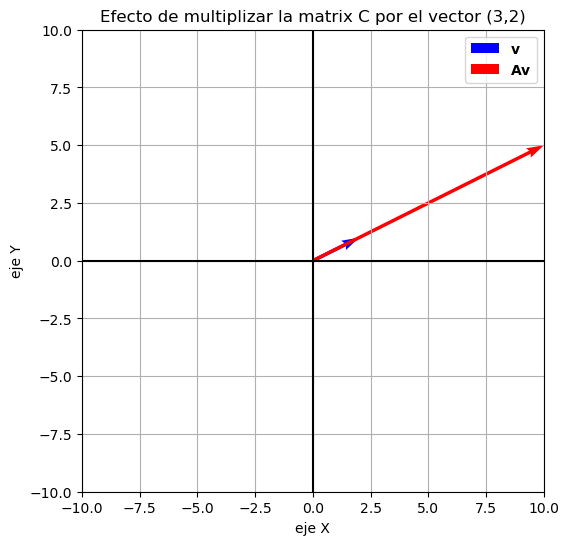

[10  5]


In [61]:
graf_matmul(A,v_1)

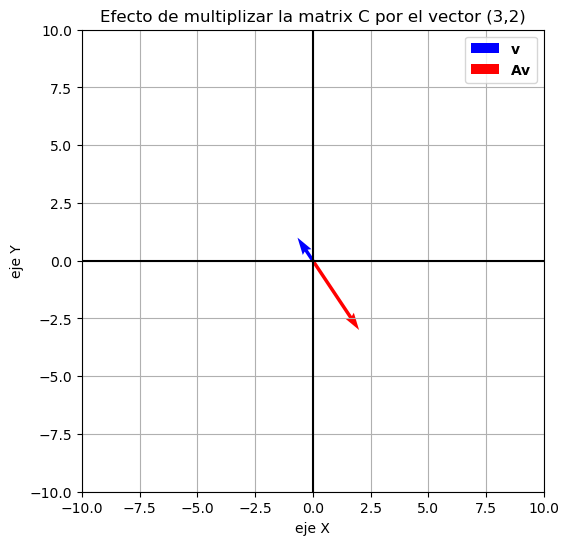

[ 2. -3.]


In [62]:
graf_matmul(A,v_2)

### Aplicaciones de EigenValues y EigenVectores

1.-Reducción de Dimensión (PCA)

2.-Sistemas de Recomendación (SVD)

3.-Comprimir Datos e Imágenes

4.-Análisis de Sentimiento de Texto

5.-Análisis de Redes (i.e, Google para medir la importancia de páginas web)

6.-Estabilidad en Sistemas Dinámicos (En ingeniería y física, los valores propias se usan para analizar estabilidad de sistemas dinámicos, ejemplos: Control de Robots). 


### Función eig( ) de numpy.lingalg

Lo anterior nos dice que el eigenvector asociado al eigenvalor 5 es $(0.89442719, 0.4472136)^t$ y el eigenvector asociado al eigenvalor -3 es (-0.5547002, 0.83205029)^t$

##### Ejercicio

Obtén los eigenvalores y eigenvectores de la matriz:
$$
B = \begin{bmatrix} 1 & 3 \\ 2 & -1 \end{bmatrix}
$$

### En muchas ocasiones, los eigenvectores nos dan información acerca del 'equilibrio' de un sistema, o de direcciones en el espacio de máxima variabilidad.

##### Ejemplo

### Modelo depredador - presa:

**Formulación Matemática**

El modelo se compone de dos ecuaciones diferenciales no lineales que describen cómo cambian las poblaciones de dos especies (presa y depredador) con el tiempo:

1. **Ecuación para la Presa** (por ejemplo, conejos):

   $$ \frac{dx}{dt} = \alpha x - \beta xy $$

   Aquí, $x$ es el número de presas, $\frac{dx}{dt}$ es la tasa de cambio de la población de presas, $\alpha$ es la tasa de crecimiento natural de las presas en ausencia de depredadores, y $\beta$ es la tasa de mortalidad de las presas debido a la depredación.

2. **Ecuación para el Depredador** (por ejemplo, zorros):

   $$ \frac{dy}{dt} = \delta xy - \gamma y $$

   Aquí, $y$ es el número de depredadores, $\frac{dy}{dt}$ es la tasa de cambio de la población de depredadores, $\delta$ es la tasa de crecimiento de los depredadores en función del consumo de presas, y $\gamma$ es la tasa de mortalidad natural de los depredadores.


Vamos a simplificar un poco el modelo para valores específicos. Sea:

$C$ = Población de conejos \
$Z$ = Población de Zorros  

y supongamos que nuestro modelo es el siguiente:

$ \displaystyle \frac{dC}{dt} = 3.5 C - Z $ 

$ \displaystyle \frac{dZ}{dt} = Z $



Podemos expresar el modelo en términos matriciales como:

$$
\begin{bmatrix} \frac{dC}{dt} \\  \frac{dZ}{dt}  \end{bmatrix} = \begin{bmatrix} 3.5 & -1 \\ 0 & 1 \end{bmatrix} \begin{bmatrix} C \\ Z \end{bmatrix} 
$$


### Diagrama de fase de la Evolución de las Poblaciones

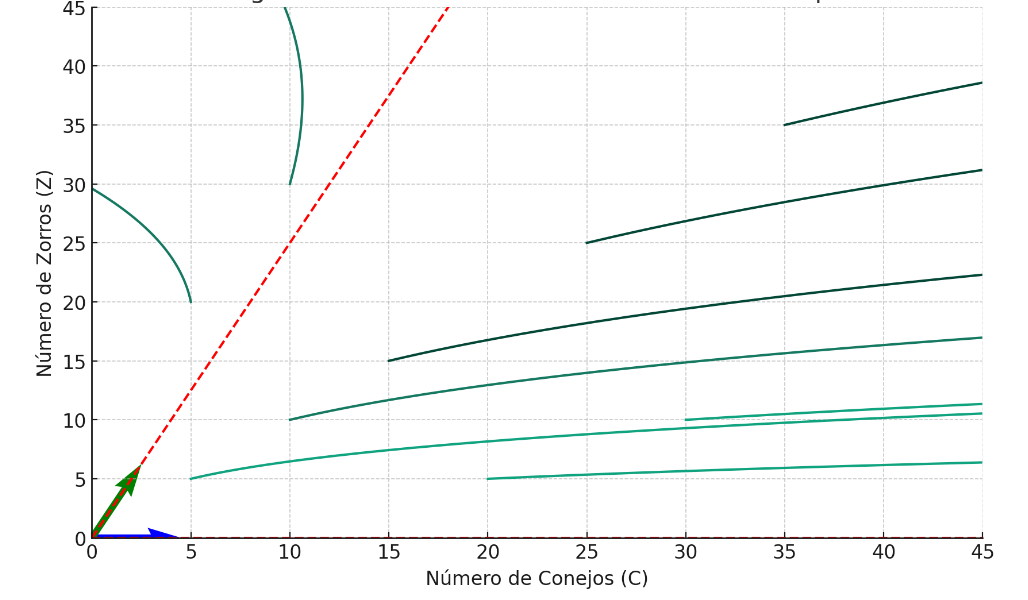

* Cada trayectoria (verde) nos dice hacia donde evolucionan las poblaciones si partimos de un punto (x,y)=(C,Z).
* A la izquierda de la line aroja punteada, la población de conejos tiende a disminuir con el tiempo, y en algunos puntos la trayectoria indica que eventualmente llegará a cero.
* A la izquiera de la línea roja, ambas poblaciones tienden a crecer, habiendo en gral más conejos que zorros. 
* Sobre las líneas rojas (punteada y el eje 'x' hay un equilibrio en el sentido en el que la razón presa - predador se mantiene constante).
* Estas líneas rojas son los **eigenvectores** de la matriz que representa al sistema.